# Titanic Multi-Dimensional Age Analysis
# =======================================
# Author: [Ashish Kumar Roy]
# Date: [2024-02-16]

## 1. Imports and Setup

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pyhere import here
import os

## 2. Load Dataset

In [ ]:
# Load Titanic dataset using `pyhere` for portability
file_path = here("Ashish", "M3", "titanic_train.csv") # The file is in folder "Ashish/M3"

# Fallback if file not found
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")

df = pd.read_csv(file_path)

## 3. Exploratory Data Analysis

In [ ]:
# Preview the dataset
print("First 5 rows:")
display(df.head())

# Dataset information
print("\nDataset Info:")
df.info()

# Column names
print("\nColumns:")
print(df.columns.tolist())

# Missing values
print("\nMissing Values (Count):")
print(df.isnull().sum())

First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Columns:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Missing Values (Count):
PassengerId      0
Survived         0
Pclass           0
Name             0
S

**Missing Value Handling**

Column	Missing	Strategy

Age	177	Fill with median based on Sex, Pclass, and Embarked

Embarked	2	Fill with overall mode Fare

Cabin	687	Drop or ignore — not used in grouping or analysis

Sex, Pclass, Survived	0	No action needed

# 4. Clean Data

In [ ]:
for col in ['Ticket', 'Cabin', 'Name', 'PassengerId']:
    if col in df.columns:
        df.drop(columns=col, inplace=True)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
None


# 5. Visualizations

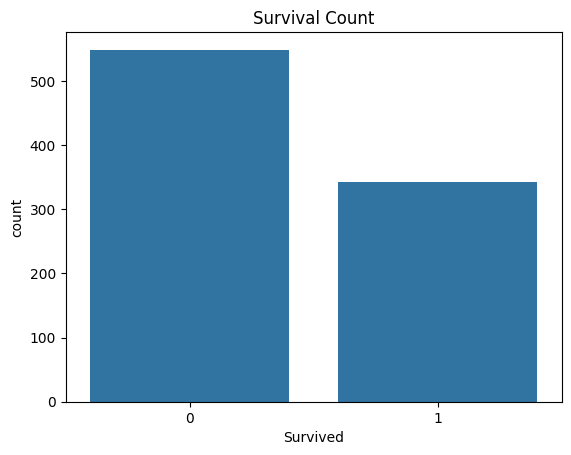

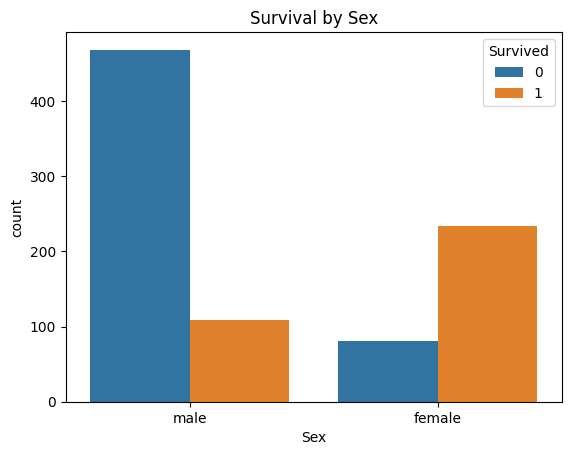

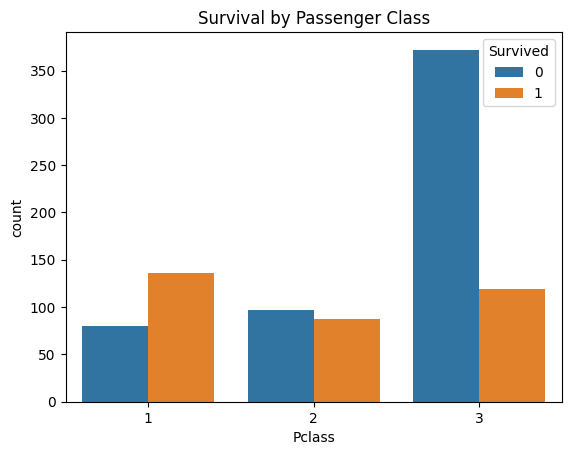

In [ ]:
sns.countplot(data=df, x='Survived')
plt.title("Survival Count")
plt.show()

sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival by Sex")
plt.show()

sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival by Passenger Class")
plt.show()

In [ ]:
def pivot_age_by_class_and_embarkation(df: pd.DataFrame) -> pd.DataFrame:
    df_clean = df.copy()
    df_clean['Fare'] = df_clean['Fare'].fillna(df_clean['Fare'].median())
    df_clean.dropna(subset=['Sex', 'Pclass', 'Embarked'], inplace=True)
    df_clean['Age'] = df_clean.groupby(['Sex', 'Pclass', 'Embarked'])['Age'].transform(
        lambda grp: grp.fillna(grp.median())
    )
    pivot_table = df_clean.pivot_table(
        index=['Sex', 'Pclass', 'Embarked'],
        values='Age',
        aggfunc=['mean', 'median'],
        fill_value=0
    )
    pivot_table['Age_Anomaly'] = np.where(
        pivot_table[('mean', 'Age')] > pivot_table[('median', 'Age')],
        'High',
        'Low'
    )
    comments = []
    for _, row in pivot_table.iterrows():
        mean_age = row[('mean', 'Age')]
        median_age = row[('median', 'Age')]
        if mean_age == 0 and median_age == 0:
            comments.append("No age data available")
        elif mean_age - median_age > 5:
            comments.append("Possibly skewed with older passengers")
        elif median_age - mean_age > 5:
            comments.append("Possibly skewed with younger passengers")
        else:
            comments.append("No significant skew")
    pivot_table["Anomaly_Comment"] = comments
    return pivot_table

In [ ]:
# Generate and display the pivot table
age_pivot = pivot_age_by_class_and_embarkation(titanic_df)
print("\nPivot Table (Age Analysis):")
display(age_pivot)

In [ ]:
## 4. Pivot Table: Age Analysis by Sex, Class, and Embarkation
def pivot_age_by_class_and_embarkation(df):
    """
    Create a pivot table showing the average and median age of passengers,
    grouped by 'Sex', 'Pclass', and 'Embarked'.

    Args:
        df (pd.DataFrame): Titanic passenger data.

    Returns:
        pd.DataFrame: Pivot table with mean and median ages.
    """
    pivot_table = df.pivot_table(
        index=["Sex", "Pclass", "Embarked"],
        values="Age",
        aggfunc=["mean", "median"],
        fill_value=0
    )

    # Detect anomaly: where mean age > median
    pivot_table["Age_Anomaly"] = np.where(
        pivot_table[("mean", "Age")] > pivot_table[("median", "Age")],
        "High",
        "Low"
    )

    return pivot_table

# Generate and display the pivot table
age_pivot = pivot_age_by_class_and_embarkation(titanic_df)
print("\nPivot Table (Age Analysis):")
display(age_pivot)

# ## 5. Optional: Save Pivot Table to CSV
# age_pivot.to_csv(here("results", "pivot_age_by_class.csv"))



Pivot Table (Age Analysis):


mean median Age_Anomaly
                              Age    Age            
Sex    Pclass Embarked                              
female 1      C         36.052632  37.00         Low
              Q         33.000000  33.00         Low
              S         32.704545  33.00         Low
       2      C         19.142857  22.00         Low
              Q         30.000000  30.00         Low
              S         29.719697  29.00        High
       3      C         14.062500  14.25         Low
              Q         22.850000  20.00        High
              S         23.223684  23.00        High
male   1      C         40.111111  36.50        High
              Q         44.000000  44.00         Low
              S         41.897188  42.00         Low
       2      C         25.937500  29.50         Low
              Q         57.000000  57.00         Low
              S         30.875889  30.00        High
       3      C         25.016800  26.00         Low
              Q         28.142857  27.00        High
              S         26.574766  25.00        High